# Clustering, DBSCAN

### План
* Сгенерируем данные
* Разобъем их на кластеры с помощью AgglomerativeClustering
* Разобъем эти же данные на кластеры с помощью DBSCAN
* Определим оптимальное число кластеров в этих данных
* Применим оба алгоритма к реальным данным

In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.datasets import make_blobs, make_circles, make_classification, make_moons
from sklearn.metrics import silhouette_score
from tqdm import tqdm

warnings.filterwarnings("ignore")

# AgglomerativeClustering

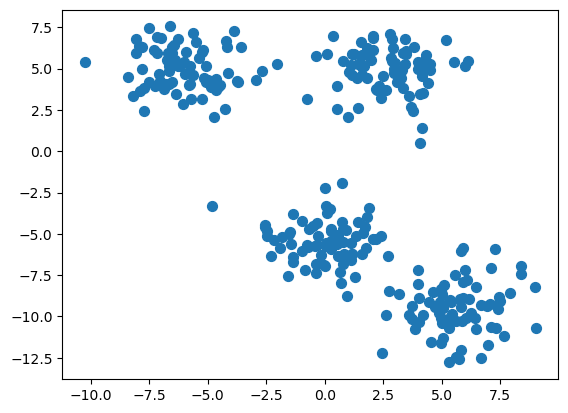

In [2]:
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=1.5, random_state=10)
plt.scatter(X[:, 0], X[:, 1], s=50);

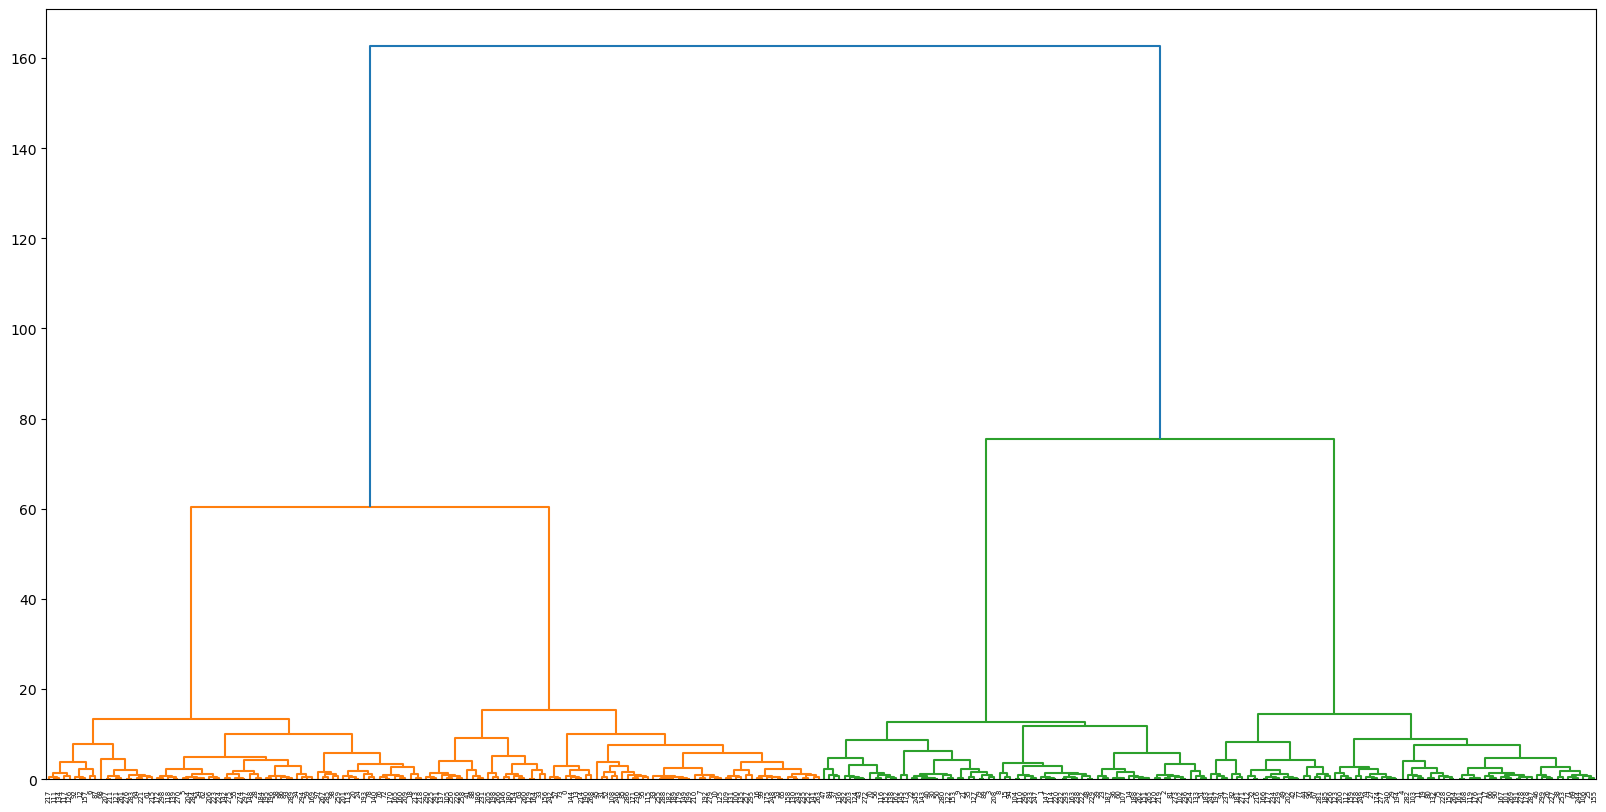

In [3]:
plt.figure(figsize=(20, 10))
linkage_ = linkage(X, method="ward")
dendrogram_ = dendrogram(linkage_)

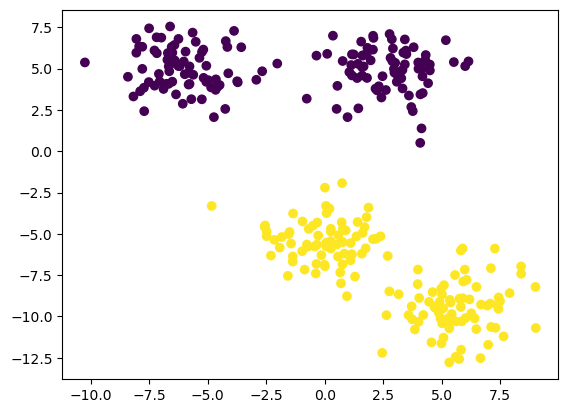

In [4]:
agg = AgglomerativeClustering(n_clusters=2).fit(X)
labels = agg.labels_

plt.scatter(X[:, 0], X[:, 1], c=labels);

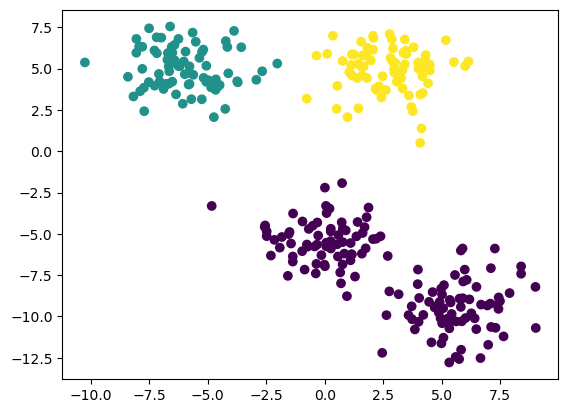

In [5]:
agg = AgglomerativeClustering(n_clusters=3).fit(X)
labels = agg.labels_

plt.scatter(X[:, 0], X[:, 1], c=labels);

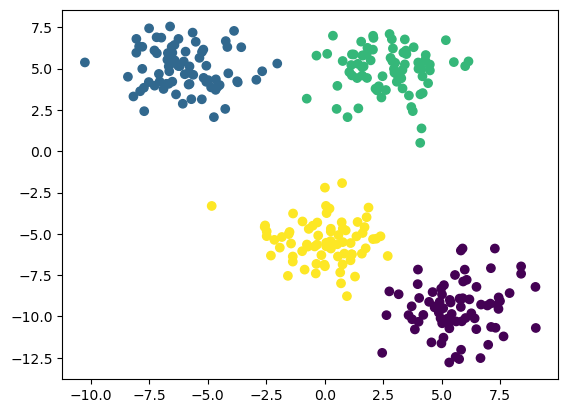

In [6]:
agg = AgglomerativeClustering(n_clusters=4).fit(X)
labels = agg.labels_

plt.scatter(X[:, 0], X[:, 1], c=labels);

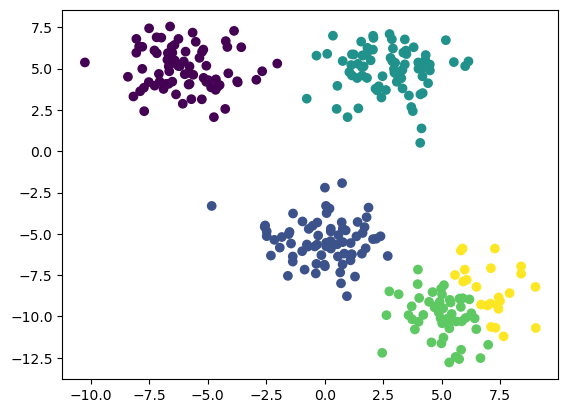

In [7]:
agg = AgglomerativeClustering(n_clusters=5).fit(X)
labels = agg.labels_

plt.scatter(X[:, 0], X[:, 1], c=labels);

### Коэффициент "Силуэт"

In [8]:
silhouette = []
for i in tqdm(range(2, 11)):
    agg = AgglomerativeClustering(n_clusters=i).fit(X)
    labels = agg.labels_
    score = silhouette_score(X, labels)
    silhouette.append(score)

100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 203.80it/s]


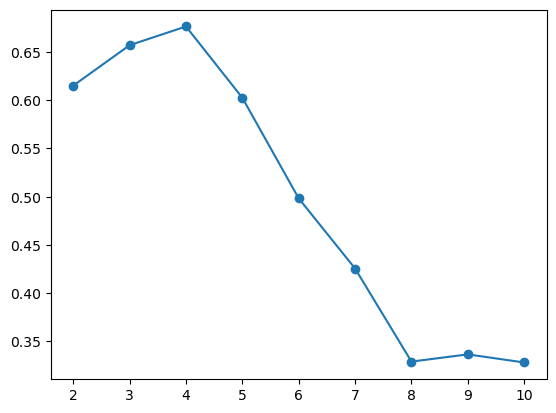

In [9]:
plt.plot(range(2, 11), silhouette, marker="o");

## Сложные формы данных

In [10]:
# AgglomerativeClustering?

In [11]:
def agg_clustering(n_clusters, X, linkage="ward"):
    agg = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage).fit(X)
    labels = agg.labels_

    plt.scatter(X[:, 0], X[:, 1], c=labels)
    plt.title(f"{n_clusters} кластера")
    plt.show();

### Два полумесяца


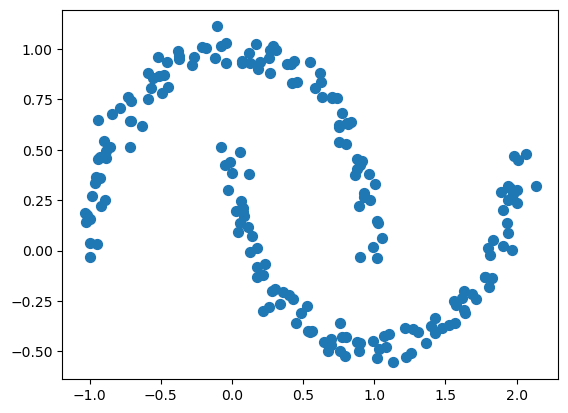

In [12]:
X, y = make_moons(200, noise=0.05, random_state=10)
plt.scatter(X[:, 0], X[:, 1], s=50);

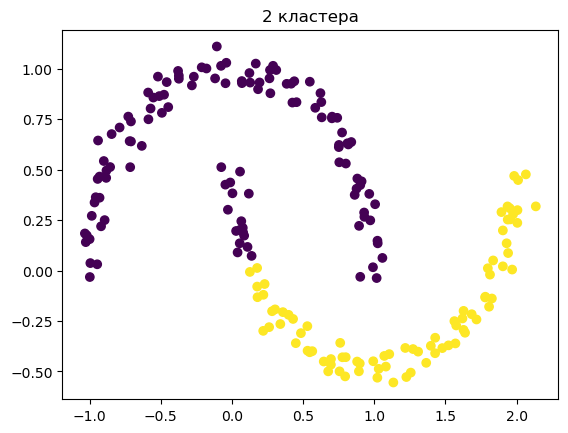

In [13]:
agg_clustering(2, X, "ward")

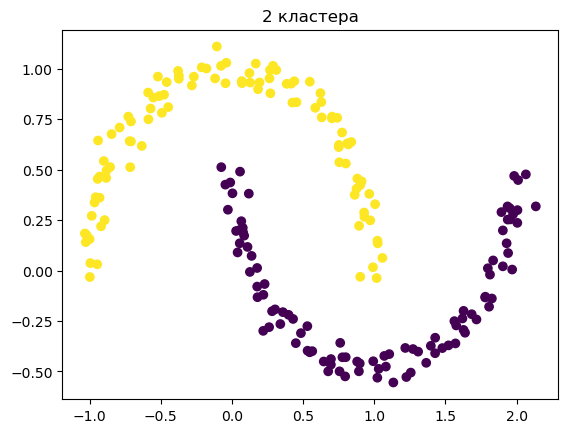

In [14]:
agg_clustering(2, X, "single")

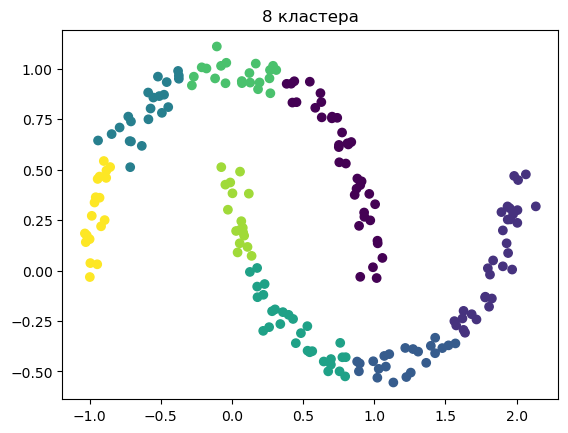

In [15]:
agg_clustering(8, X, "ward")

In [16]:
silhouette = []
for i in tqdm(range(2, 11)):
    agg = AgglomerativeClustering(n_clusters=i).fit(X)
    labels = agg.labels_
    score = silhouette_score(X, labels)
    silhouette.append(score)

100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 346.09it/s]


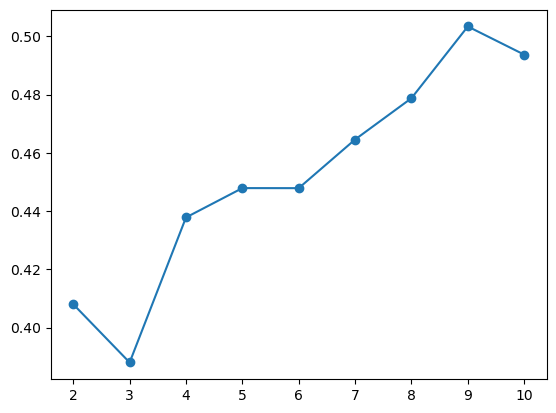

In [17]:
plt.plot(range(2, 11), silhouette, marker="o");

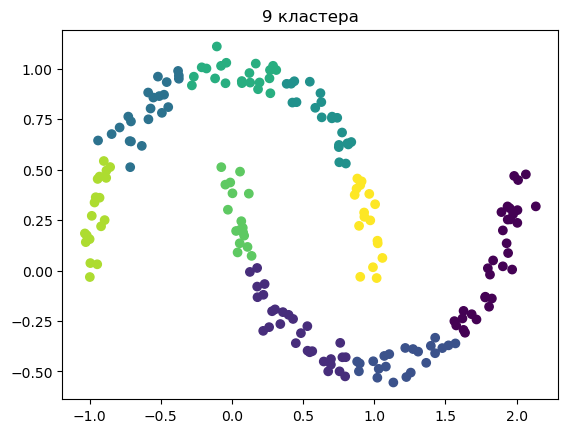

In [18]:
agg_clustering(9, X)

100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 321.48it/s]


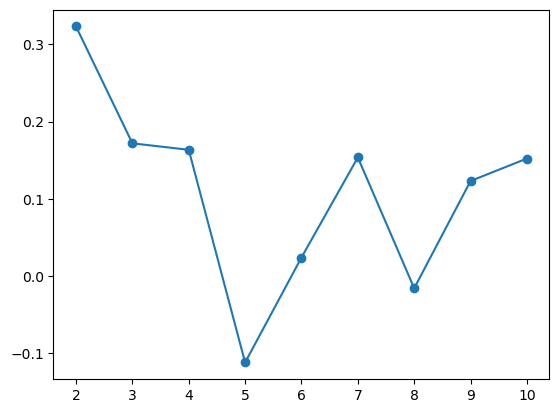

In [19]:
silhouette = []
for i in tqdm(range(2, 11)):
    agg = AgglomerativeClustering(n_clusters=i, linkage="single").fit(X)
    labels = agg.labels_
    score = silhouette_score(X, labels)
    silhouette.append(score)
plt.plot(range(2, 11), silhouette, marker="o");

### Круги

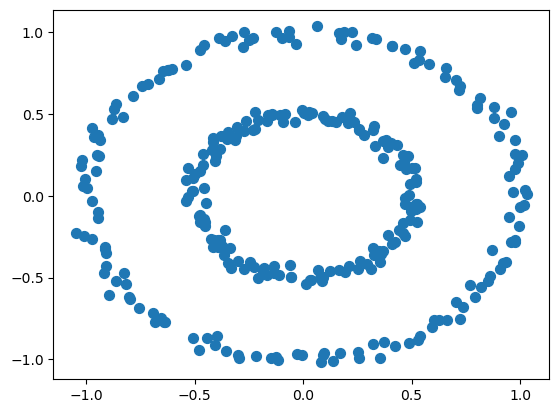

In [20]:
X, y = make_circles(n_samples=300, noise=0.03, random_state=10, factor=0.5)
plt.scatter(X[:, 0], X[:, 1], s=50);

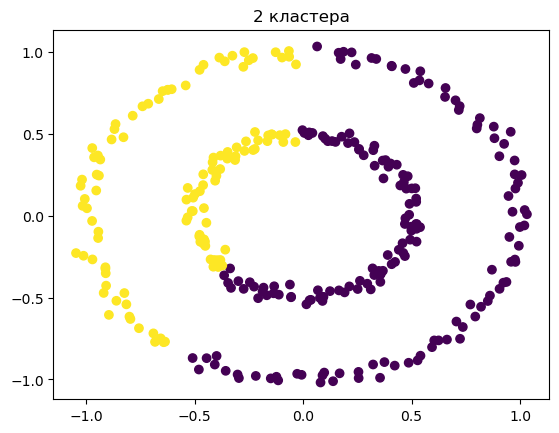

In [21]:
agg_clustering(2, X)

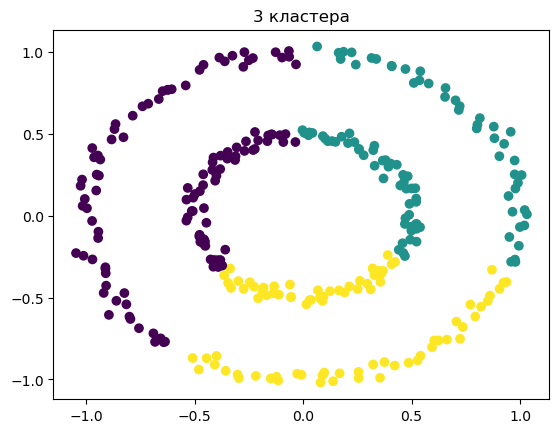

In [22]:
agg_clustering(3, X)

In [23]:
silhouette = []
for i in tqdm(range(2, 21)):
    agg = AgglomerativeClustering(n_clusters=i).fit(X)
    labels = agg.labels_
    score = silhouette_score(X, labels)
    silhouette.append(score)

100%|█████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 161.68it/s]


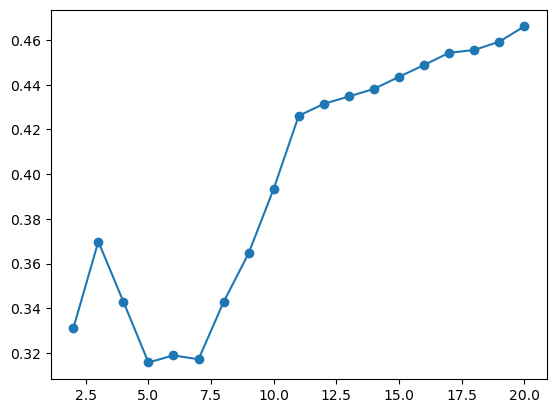

In [24]:
plt.plot(range(2, 21), silhouette, marker="o");

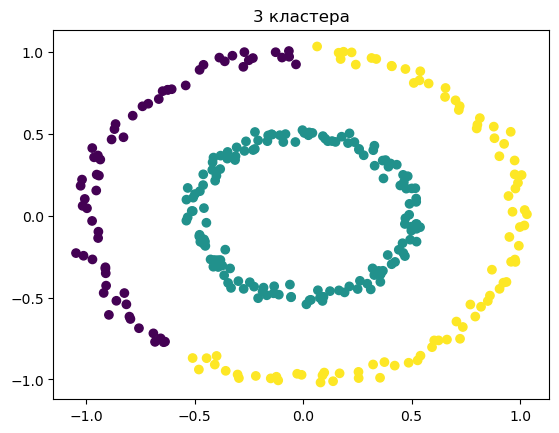

In [25]:
agg_clustering(3, X, "single")

In [26]:
silhouette = []
for i in tqdm(range(2, 10)):
    agg = AgglomerativeClustering(n_clusters=i, linkage="single").fit(X)
    labels = agg.labels_
    score = silhouette_score(X, labels)
    silhouette.append(score)

100%|███████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 228.66it/s]


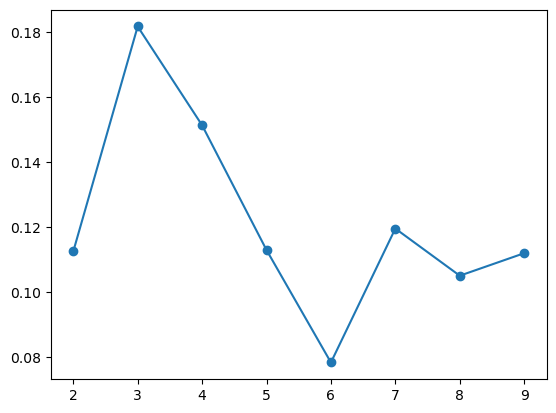

In [27]:
plt.plot(range(2, 10), silhouette, marker="o");

### Анизотропное распределение

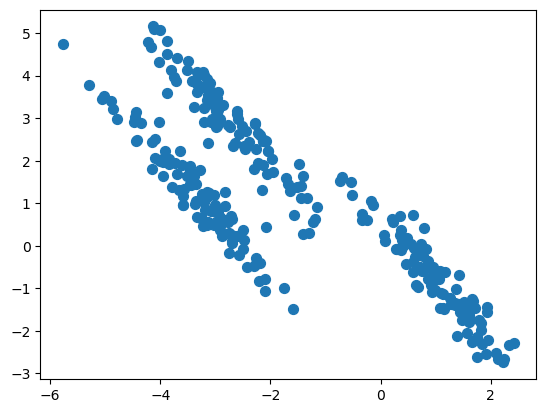

In [28]:
X, y_true = make_blobs(n_samples=300, centers=3, random_state=170)
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X = np.dot(X, transformation)
plt.scatter(X[:, 0], X[:, 1], s=50);

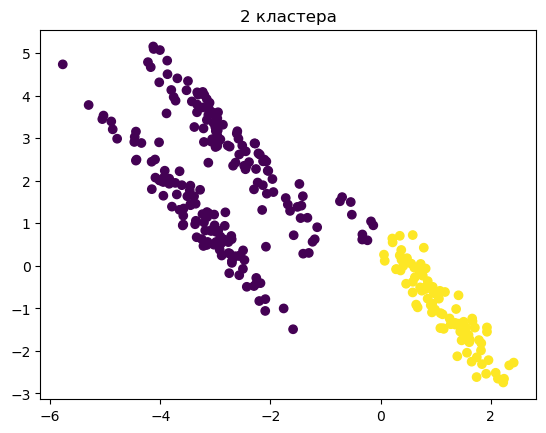

In [29]:
agg_clustering(2, X)

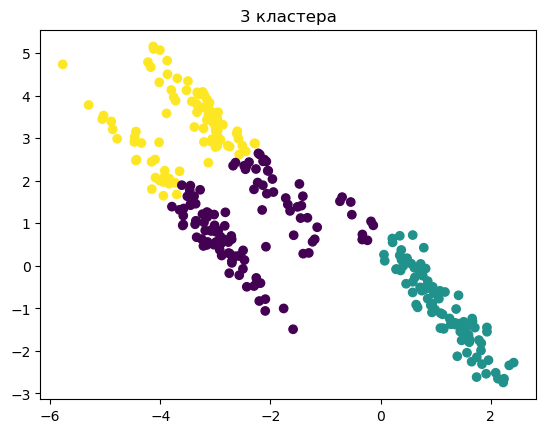

In [30]:
agg_clustering(3, X)

In [31]:
silhouette = []
for i in tqdm(range(2, 11)):
    agg = AgglomerativeClustering(n_clusters=i).fit(X)
    labels = agg.labels_
    score = silhouette_score(X, labels)
    silhouette.append(score)

100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 200.02it/s]


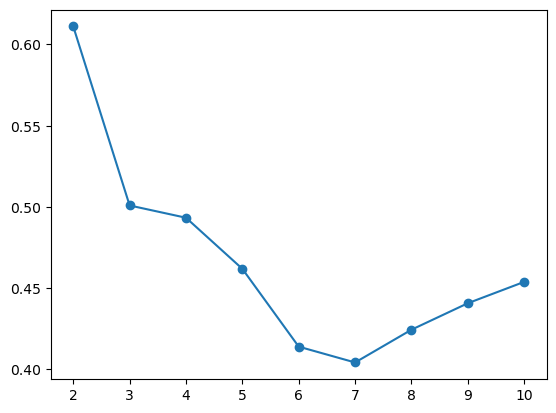

In [32]:
plt.plot(range(2, 11), silhouette, marker="o");

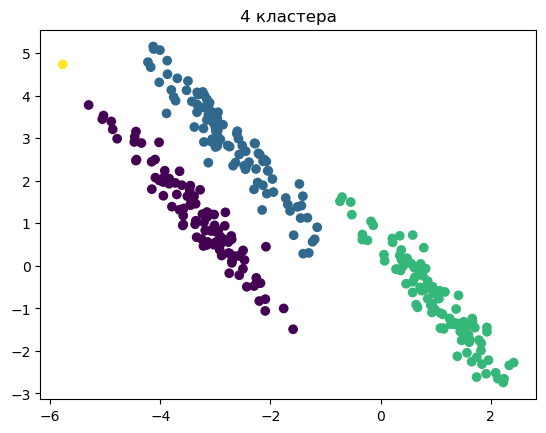

In [33]:
agg_clustering(4, X, "single")

100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 219.51it/s]


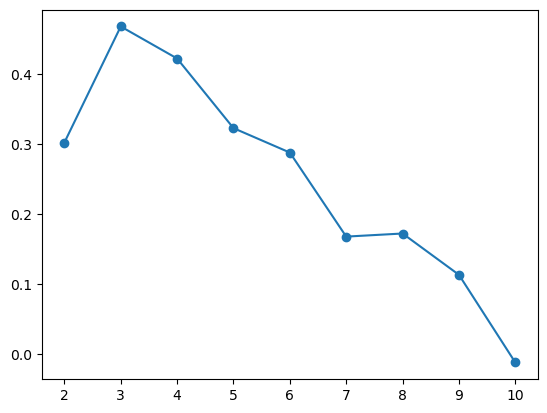

In [34]:
silhouette = []
for i in tqdm(range(2, 11)):
    agg = AgglomerativeClustering(n_clusters=i, linkage="single").fit(X)
    labels = agg.labels_
    score = silhouette_score(X, labels)
    silhouette.append(score)
plt.plot(range(2, 11), silhouette, marker="o");

## DBSCAN

https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/


<img src="https://upload.wikimedia.org/wikipedia/commons/a/af/DBSCAN-Illustration.svg" width=500>

**Алгоритм:**
- 1. Выбираем случайную точку и находим её соседей в заданной
окрестности
- 2. Если соседей меньше критического значения – называем выбросами
- 3. Если нет – объединяем в «плотный» кластер и повторяем поиск соседей
- 4. Если все плотные точки пройдены и помечены как посещенные – выбираем новую не посещенную точку и начинаем сначала

Повторяем, пока все точки не будут посещены


**Преимущества:**
- Density-based (плотностной/вероятностный) метод – умеет в сложные формы кластеров
- Может использоваться для поиска выбросов и аномалий в данных (про это на следующем вебинаре)

**Недостатки:**
- Довольно сложный в настройке – очень чувствителен к параметру ”плотности” epsilon

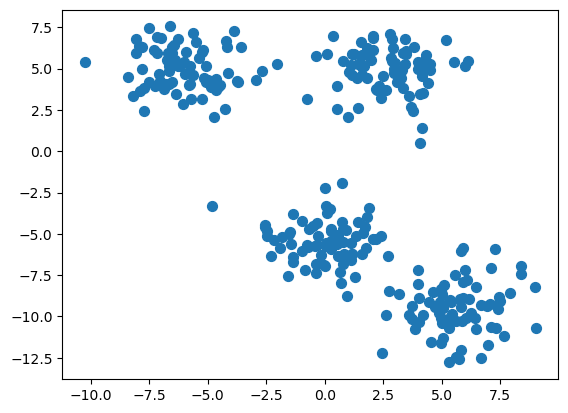

In [35]:
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=1.5, random_state=10)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [36]:
dbscan = DBSCAN(eps=0.5, min_samples=5).fit(X)
labels = dbscan.labels_

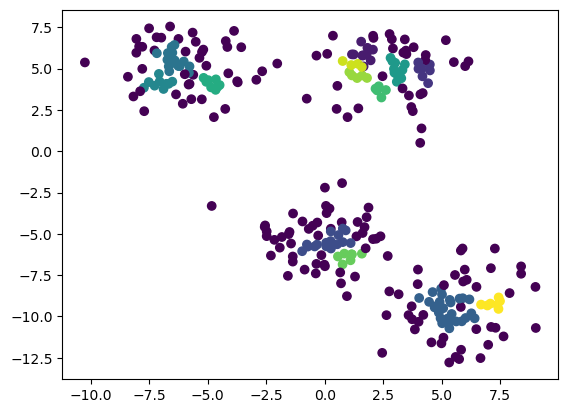

In [37]:
plt.scatter(X[:, 0], X[:, 1], c=labels);

In [38]:
uniq_labels = np.unique(labels)
uniq_labels

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
      dtype=int64)

In [39]:
n_clusters = len(uniq_labels[uniq_labels != -1])
n_clusters

13

кластеров: 13


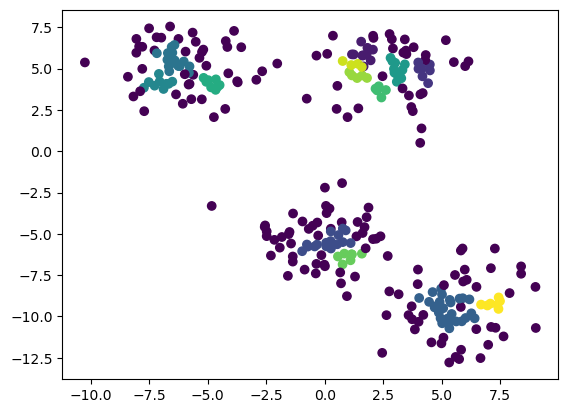

In [40]:
dbscan = DBSCAN().fit(X)
labels = dbscan.labels_
uniq_labels = np.unique(labels)
n_clusters = len(uniq_labels[uniq_labels != -1])
print(f"кластеров: {n_clusters}")
plt.scatter(X[:, 0], X[:, 1], c=labels);

Что можно изменить, чтобы улучшить результат?

кластеров: 4


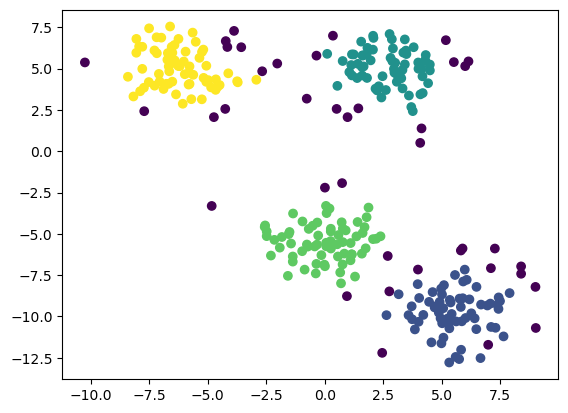

In [41]:
dbscan = DBSCAN(eps=1, min_samples=5).fit(X)
labels = dbscan.labels_
uniq_labels = np.unique(labels)
n_clusters = len(uniq_labels[uniq_labels != -1])
print(f"кластеров: {n_clusters}")
plt.scatter(X[:, 0], X[:, 1], c=labels);

кластеров: 0


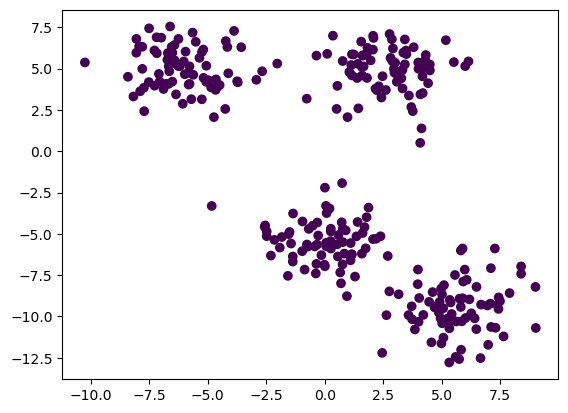

In [42]:
dbscan = DBSCAN(eps=0.1, min_samples=5).fit(X)
labels = dbscan.labels_
uniq_labels = np.unique(labels)
n_clusters = len(uniq_labels[uniq_labels != -1])
print(f"кластеров: {n_clusters}")
plt.scatter(X[:, 0], X[:, 1], c=labels);

При слишком маленьком eps все точки "выродились" в аномалии. 

In [43]:
np.unique(labels)[np.unique(labels) != -1]

array([], dtype=int64)

### Коэффициент "Силуэт"

In [44]:
silhouette = []
clusters = []
eps_range = np.arange(0.1, 2, 0.1)
for i in tqdm(eps_range):
    dbscan = DBSCAN(eps=i).fit(X)
    labels = dbscan.labels_
    uniq_labels = np.unique(labels)
    n_clusters = len(uniq_labels[uniq_labels != -1])
    if n_clusters > 1:
        score = silhouette_score(X, labels)
    else:
        score = 0
    silhouette.append(score)
    clusters.append(n_clusters)

100%|█████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 177.94it/s]


Посмотрим, как меняется силуэт и число кластеров в зависимости от eps.

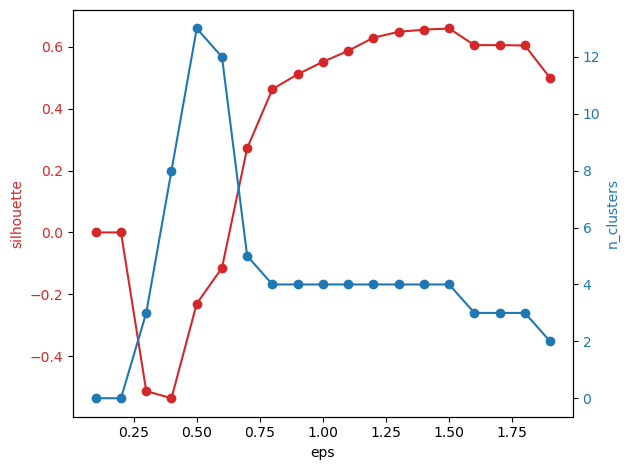

In [45]:
fig, ax1 = plt.subplots()

color = "tab:red"
ax1.plot(eps_range, silhouette, marker="o", color=color)
ax1.set_xlabel("eps")
ax1.set_ylabel("silhouette", color=color)
ax1.tick_params(axis="y", labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = "tab:blue"
ax2.plot(eps_range, clusters, marker="o", color=color)
ax2.set_ylabel("n_clusters", color=color)
ax2.tick_params(axis="y", labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## Сложные формы данных

In [46]:
def dbscan_clustering(eps_range, X):
    eps_range = eps_range
    silhouette = []
    clusters = []
    for i in tqdm(eps_range):
        dbscan = DBSCAN(eps=i).fit(X)
        labels = dbscan.labels_
        uniq_labels = np.unique(labels)
        n_clusters = len(uniq_labels[uniq_labels != -1])
        if n_clusters > 1:
            score = silhouette_score(X, labels)
        else:
            score = 0
        silhouette.append(score)
        clusters.append(n_clusters)

    fig, ax1 = plt.subplots()

    color = "tab:red"
    ax1.plot(eps_range, silhouette, marker="o", color=color)
    ax1.set_xlabel("eps")
    ax1.set_ylabel("silhouette", color=color)
    ax1.tick_params(axis="y", labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = "tab:blue"
    ax2.plot(eps_range, clusters, marker="o", color=color)
    ax2.set_ylabel("n_clusters", color=color)
    ax2.tick_params(axis="y", labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

### Два полумесяца

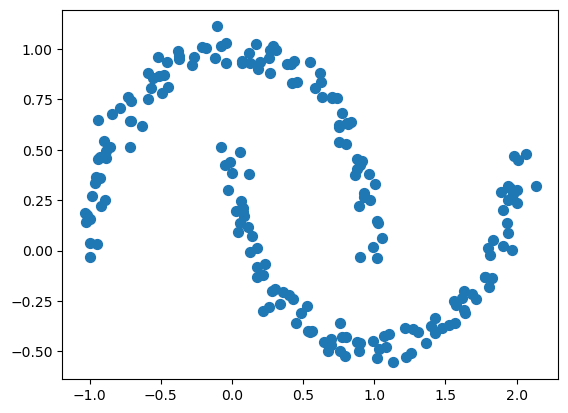

In [47]:
X, y = make_moons(200, noise=0.05, random_state=10)
plt.scatter(X[:, 0], X[:, 1], s=50);

100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 240.19it/s]


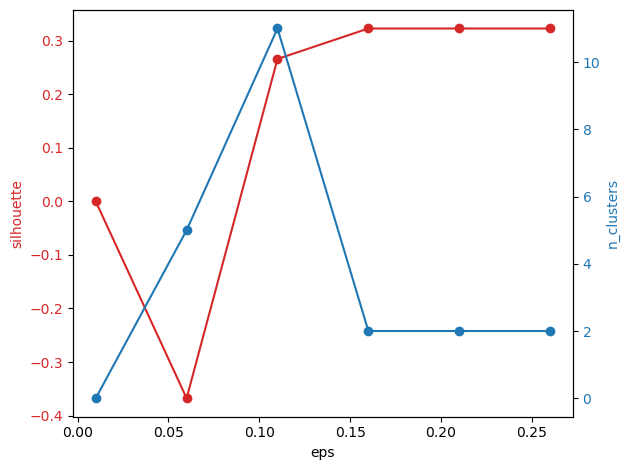

In [48]:
eps_range = np.arange(0.01, 0.3, 0.05)
dbscan_clustering(eps_range, X)

кластеров: 2


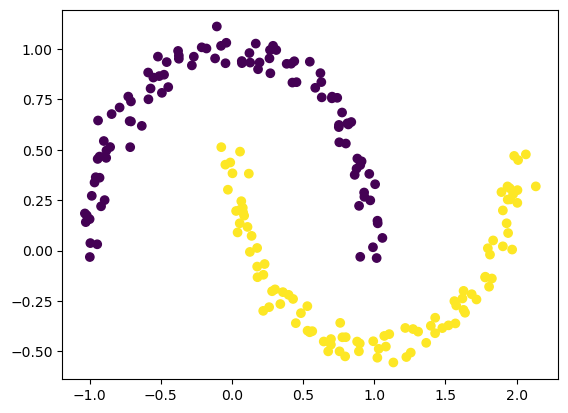

In [49]:
dbscan = DBSCAN(eps=0.2, min_samples=5).fit(X)
labels = dbscan.labels_
uniq_labels = np.unique(labels)
n_clusters = len(uniq_labels[uniq_labels != -1])
print(f"кластеров: {n_clusters}")
plt.scatter(X[:, 0], X[:, 1], c=labels);

### Круги

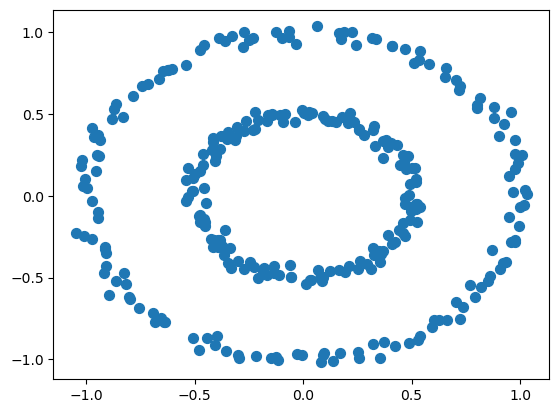

In [50]:
X, y = make_circles(n_samples=300, noise=0.03, random_state=10, factor=0.5)
plt.scatter(X[:, 0], X[:, 1], s=50);

100%|█████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 203.24it/s]


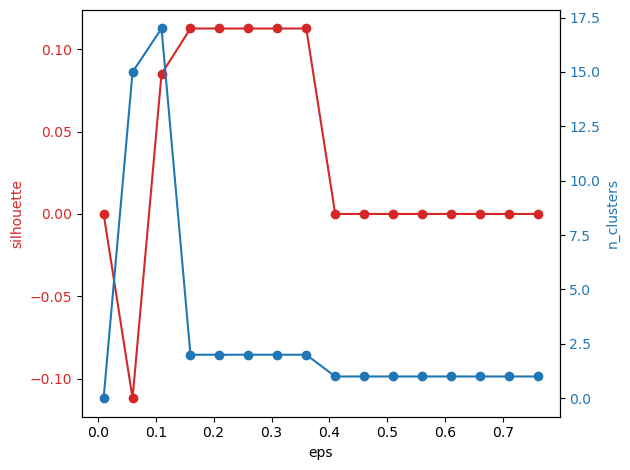

In [51]:
eps_range = np.arange(0.01, 0.8, 0.05)
dbscan_clustering(eps_range, X)

кластеров: 2


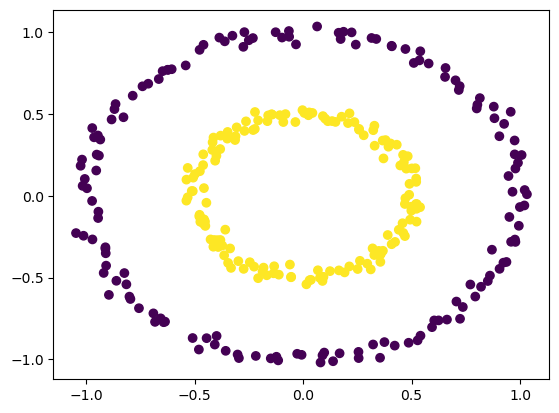

In [52]:
dbscan = DBSCAN(eps=0.2, min_samples=5).fit(X)
labels = dbscan.labels_
uniq_labels = np.unique(labels)
n_clusters = len(uniq_labels[uniq_labels != -1])
print(f"кластеров: {n_clusters}")
plt.scatter(X[:, 0], X[:, 1], c=labels);

### Анизотропное распределение

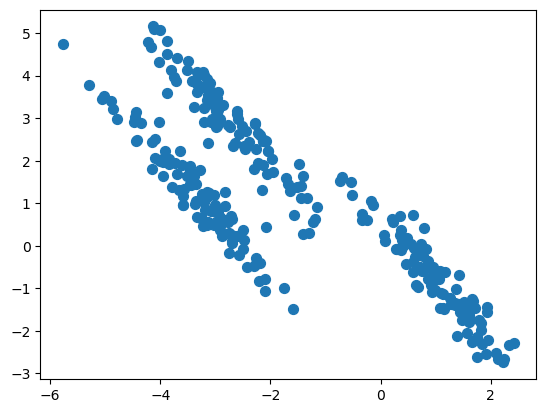

In [53]:
X, y_true = make_blobs(n_samples=300, centers=3, random_state=170)
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X = np.dot(X, transformation)
plt.scatter(X[:, 0], X[:, 1], s=50);

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 173.87it/s]


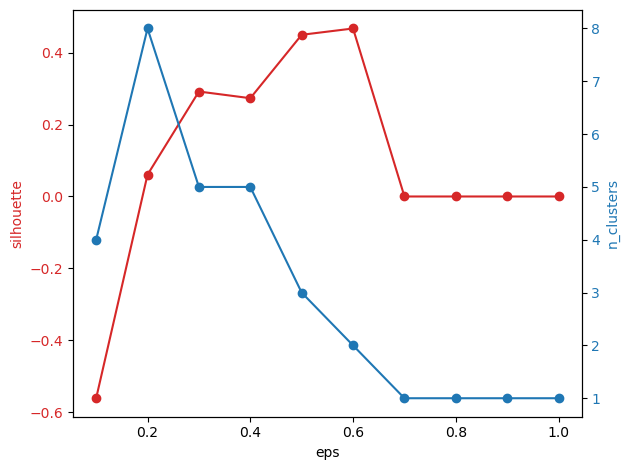

In [54]:
eps_range = np.arange(0.1, 1.1, 0.1)
dbscan_clustering(eps_range, X)

кластеров: 2


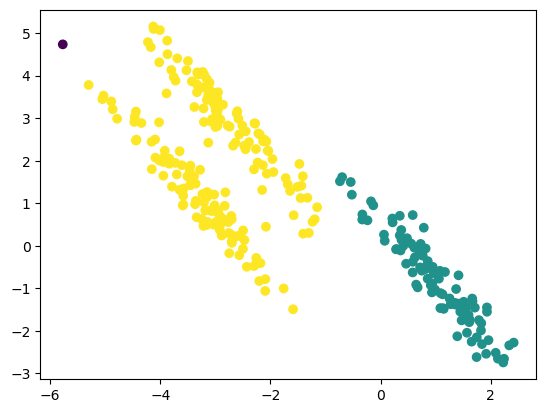

In [55]:
dbscan = DBSCAN(eps=0.6, min_samples=5).fit(X)
labels = dbscan.labels_
uniq_labels = np.unique(labels)
n_clusters = len(uniq_labels[uniq_labels != -1])
print(f"кластеров: {n_clusters}")
plt.scatter(X[:, 0], X[:, 1], c=labels);

кластеров: 3


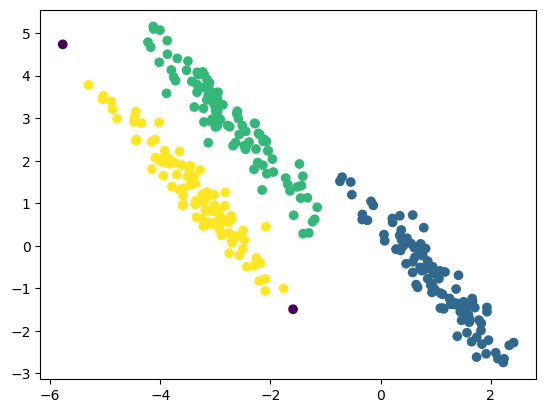

In [56]:
dbscan = DBSCAN(eps=0.5, min_samples=5).fit(X)
labels = dbscan.labels_
uniq_labels = np.unique(labels)
n_clusters = len(uniq_labels[uniq_labels != -1])
print(f"кластеров: {n_clusters}")
plt.scatter(X[:, 0], X[:, 1], c=labels);

кластеров: 1


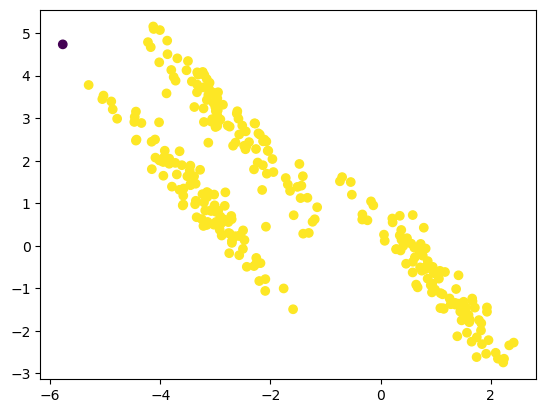

In [57]:
dbscan = DBSCAN(eps=0.8, min_samples=5).fit(X)
labels = dbscan.labels_
uniq_labels = np.unique(labels)
n_clusters = len(uniq_labels[uniq_labels != -1])
print(f"кластеров: {n_clusters}")
plt.scatter(X[:, 0], X[:, 1], c=labels);

# Bonus: кластеризация на реальных данных

Результаты опроса World Happiness Report с [соревнования Kaggle](https://www.kaggle.com/unsdsn/world-happiness). Воспользуемся данными за 2019 год.


In [58]:
from pathlib import Path

data_path = Path.cwd().parents[1].joinpath("data", "2019.csv")
data = pd.read_csv(data_path)

In [59]:
data.shape

(156, 9)

In [60]:
data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


Колонки Overall rank и Country or region (страна) являются уникальнами, поэтому при клатеризации мы их выкинем.

In [62]:
data["Overall rank"].nunique()

156

In [63]:
data.drop("Overall rank", axis=1, inplace=True)

In [64]:
print(data["Country or region"].nunique())
country = data["Country or region"]

156


In [65]:
data.drop("Country or region", axis=1, inplace=True)

In [66]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Score,156.0,5.407096,1.113120,2.853,4.54450,5.3795,6.18450,7.769
GDP per capita,156.0,0.905147,0.398389,0.000,0.60275,0.9600,1.23250,1.684
Social support,156.0,1.208814,0.299191,0.000,1.05575,1.2715,1.45250,1.624
Healthy life expectancy,156.0,0.725244,0.242124,0.000,0.54775,0.7890,0.88175,1.141
Freedom to make life choices,156.0,0.392571,0.143289,0.000,0.30800,0.4170,0.50725,0.631
Generosity,156.0,0.184846,0.095254,0.000,0.10875,0.1775,0.24825,0.566
Perceptions of corruption,156.0,0.110603,0.094538,0.000,0.04700,0.0855,0.14125,0.453


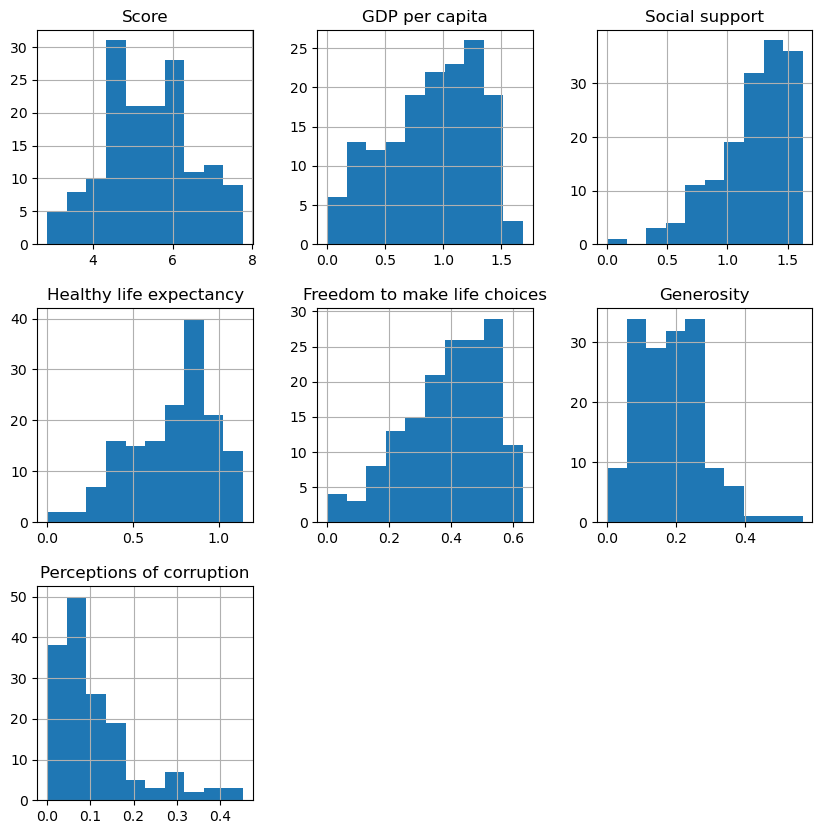

In [67]:
data.hist(figsize=(10, 10));

## EDA & Preprocessing
## 1. Корреляции

In [68]:
corr = data.corr()

In [69]:
mask = np.triu(np.ones_like(corr, dtype=bool))

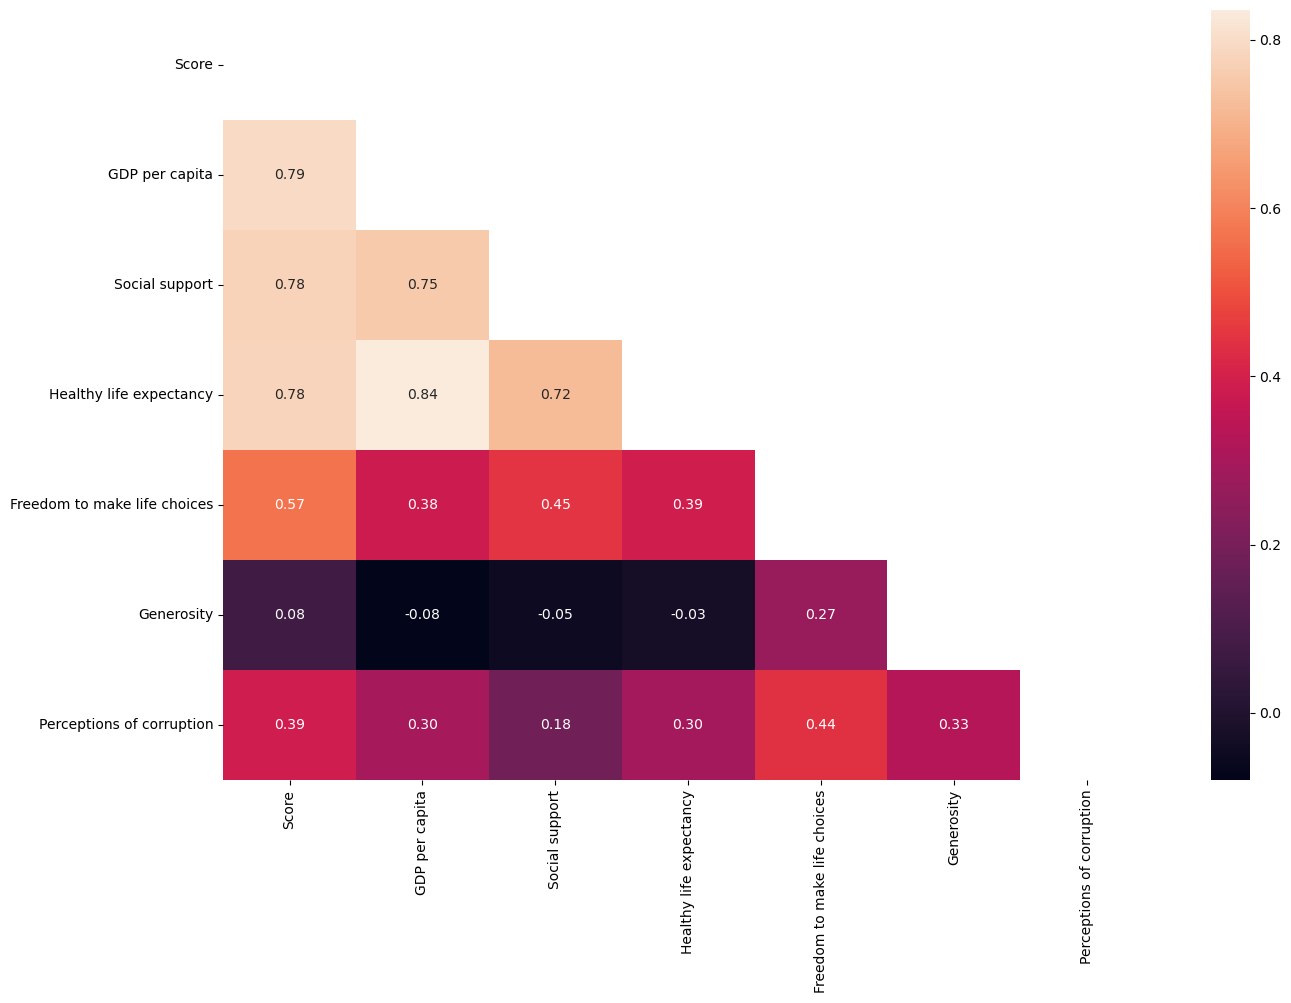

In [70]:
plt.figure(figsize=(15, 10))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f");

# 2. Нормализация

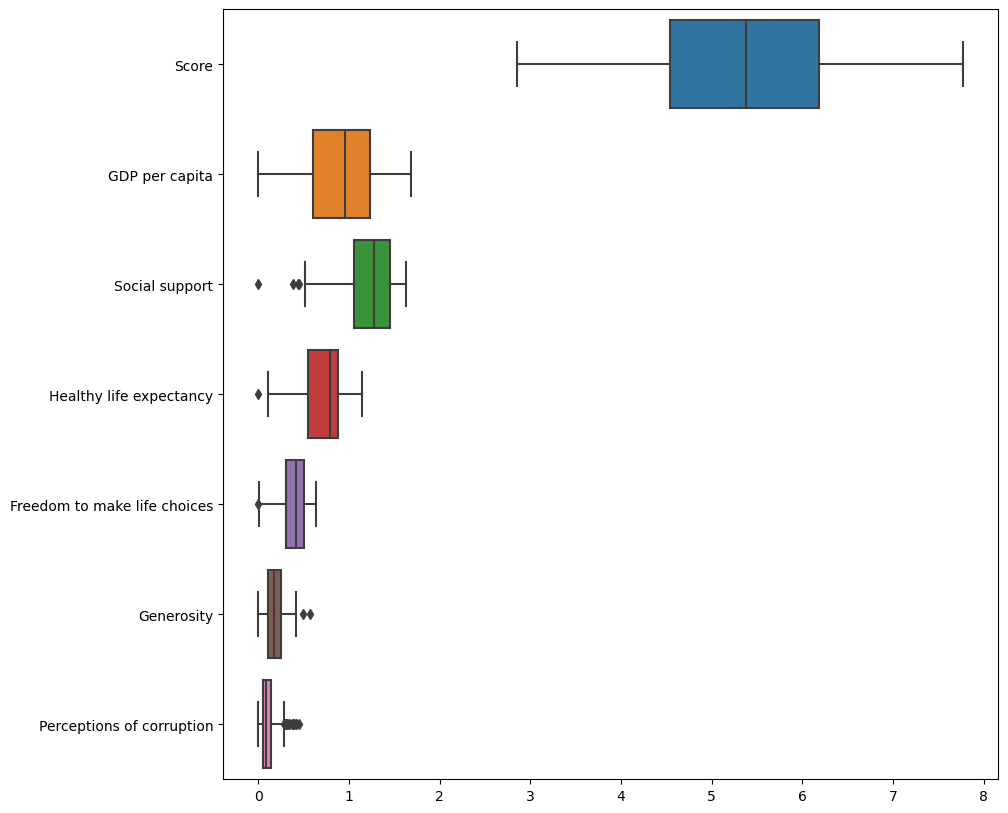

In [71]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=data, orient="h");

In [72]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(X_scaled, columns=data.columns)
data_scaled.head()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1.000000,0.795724,0.977217,0.864154,0.944532,0.270318,0.867550
1,0.965622,0.821259,0.968596,0.872918,0.938193,0.445230,0.905077
2,0.956265,0.883610,0.974138,0.900964,0.955626,0.478799,0.752759
3,0.944060,0.819477,1.000000,0.899211,0.936609,0.625442,0.260486
4,0.942840,0.828979,0.937192,0.875548,0.882726,0.568905,0.657837


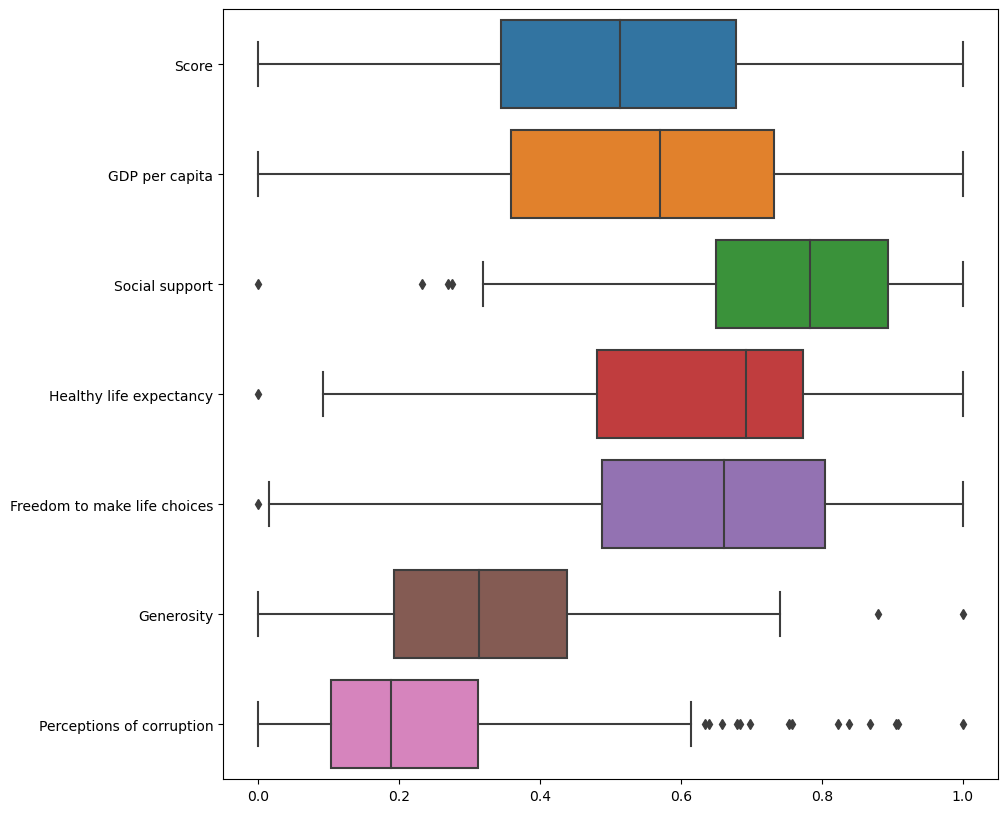

In [73]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=data_scaled, orient="h");

# 3. Снижение размерности 
Для простоты визуализации применим к данным TSNE и отобразим из на двумерную плоскость.

In [74]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=10)
print(X_scaled.shape)
X_tsne = tsne.fit_transform(X_scaled)
print(X_tsne.shape)

(156, 7)
(156, 2)


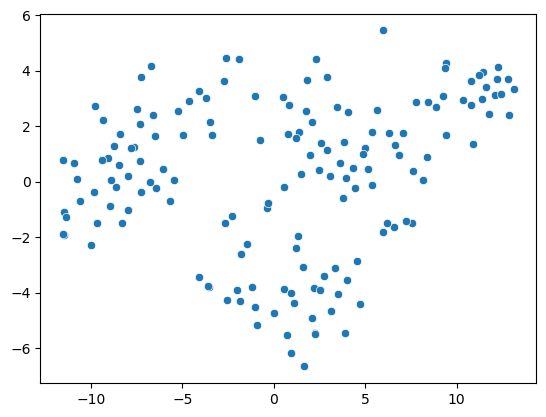

In [75]:
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1]);

# 4. Кластеризация

## 4.1 AgglomerativeClustering

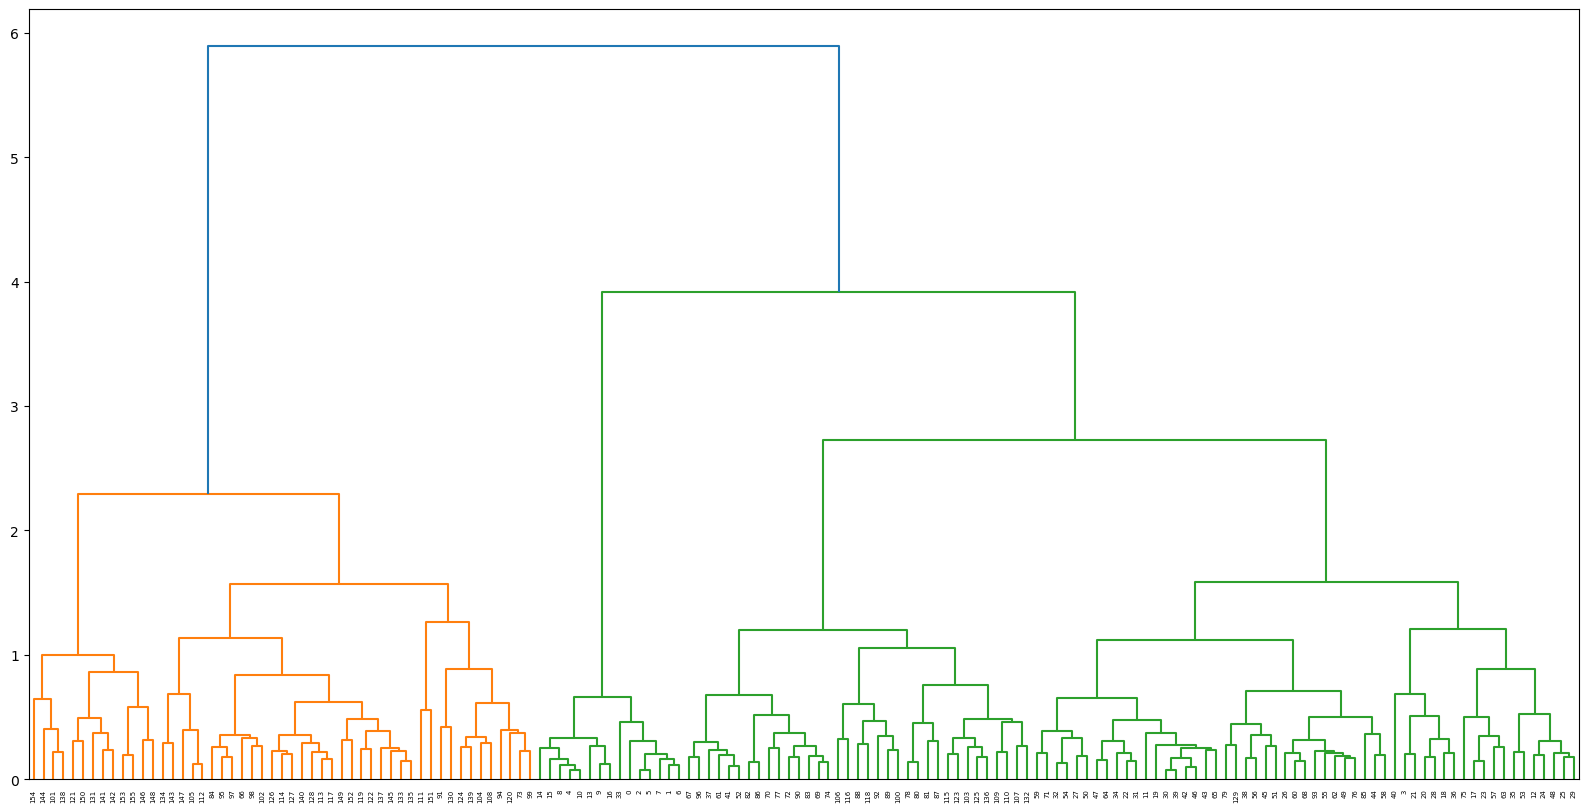

In [76]:
plt.figure(figsize=(20, 10))
linkage_ = linkage(X_scaled, method="ward")
dendrogram_ = dendrogram(linkage_)

In [77]:
silhouette = []
for i in tqdm(range(2, 11)):
    agg = AgglomerativeClustering(n_clusters=i).fit(X_scaled)
    labels = agg.labels_
    score = silhouette_score(X_scaled, labels)
    silhouette.append(score)

100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 382.91it/s]


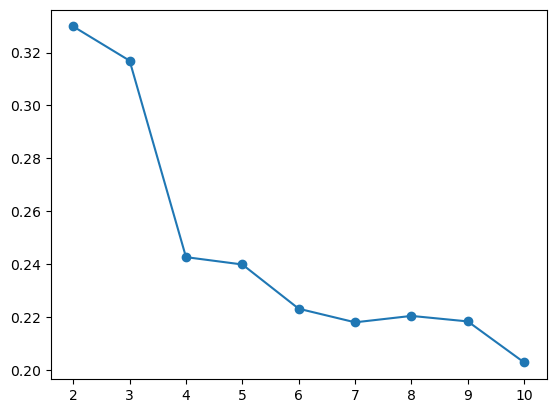

In [78]:
plt.plot(range(2, 11), silhouette, marker="o");

In [79]:
agg = AgglomerativeClustering(n_clusters=3).fit(X_scaled)
labels = agg.labels_

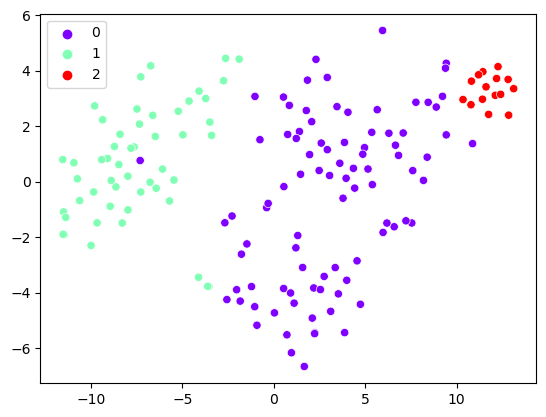

In [80]:
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=labels, palette="rainbow");

In [81]:
data["labels"] = labels

In [82]:
data["labels"].value_counts(normalize=True)

0    0.576923
1    0.326923
2    0.096154
Name: labels, dtype: float64

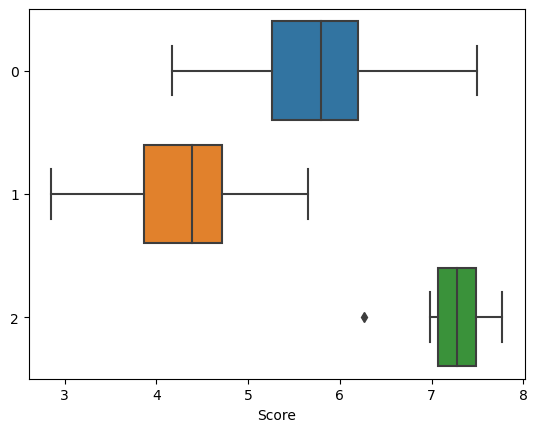

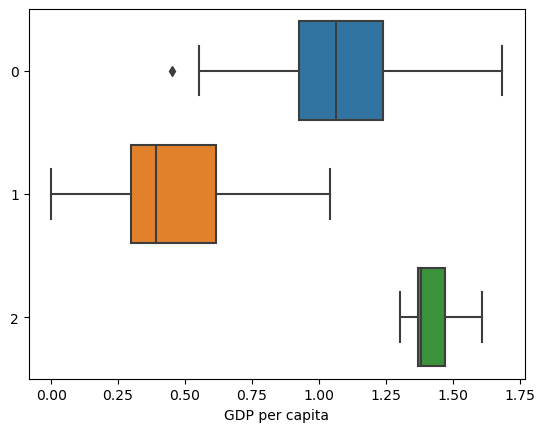

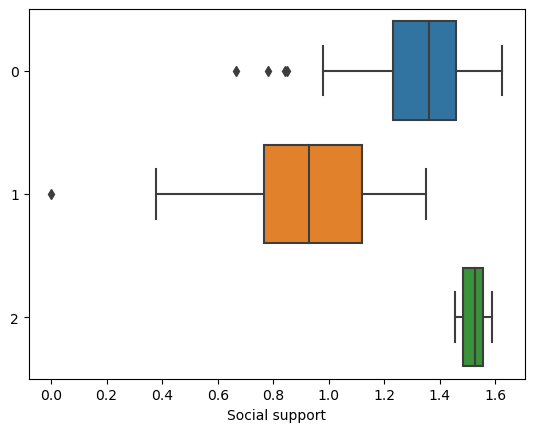

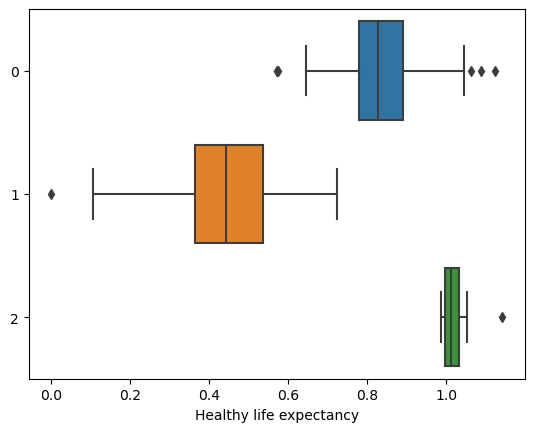

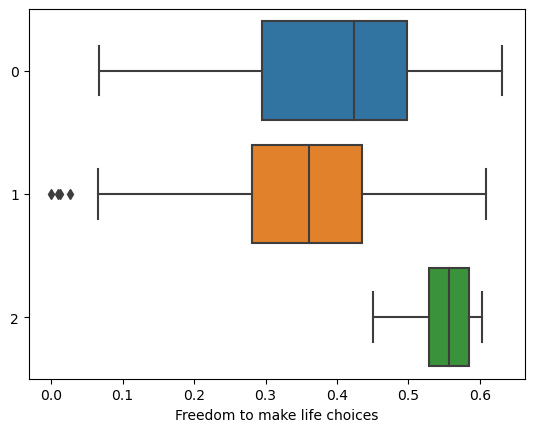

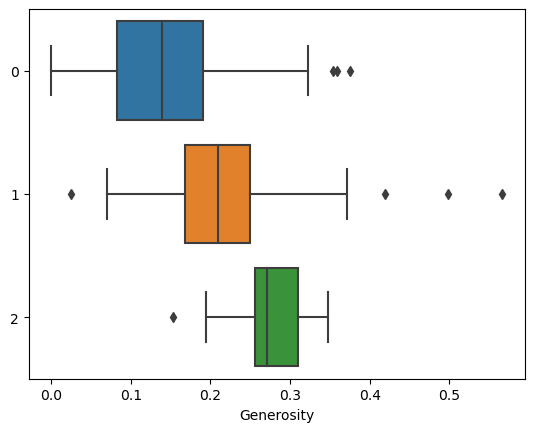

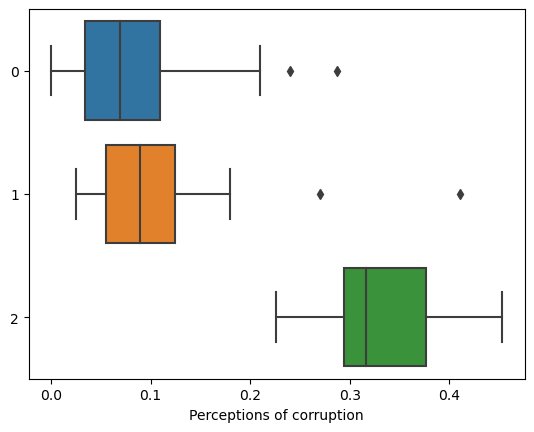

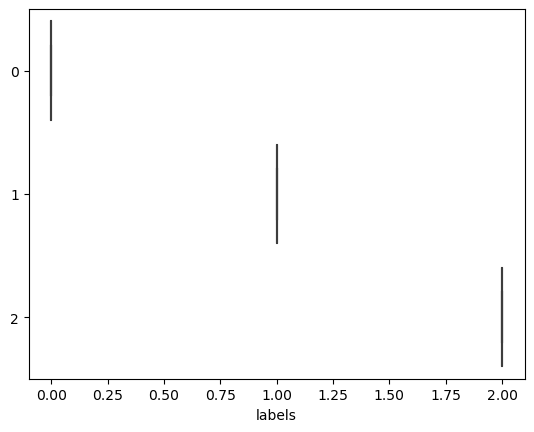

In [83]:
for col in data.columns:
    sns.boxplot(data=data, x=col, y=labels, orient="h")
    plt.show();

In [84]:
data.groupby("labels").median().T.round(2)

labels,0,1,2
Score,5.79,4.39,7.28
GDP per capita,1.06,0.39,1.38
Social support,1.36,0.93,1.53
Healthy life expectancy,0.83,0.44,1.01
Freedom to make life choices,0.42,0.36,0.56
Generosity,0.14,0.21,0.27
Perceptions of corruption,0.07,0.09,0.32


## 4.1 DBSCAN

100%|█████████████████████████████████████████████████████████████████████████████████| 90/90 [00:00<00:00, 387.61it/s]


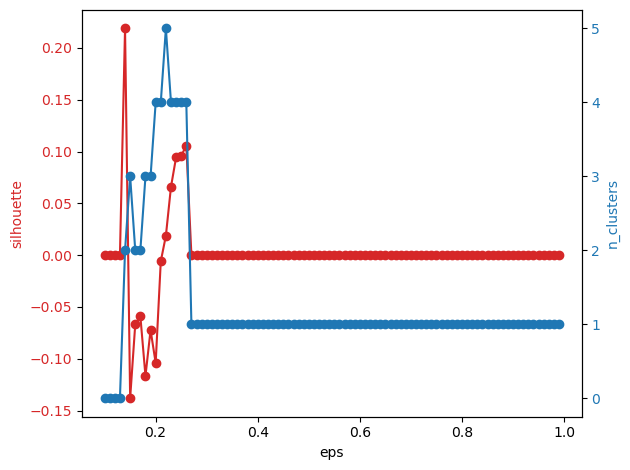

In [85]:
eps_range = np.arange(0.1, 1, 0.01)
dbscan_clustering(eps_range, X_scaled)

100%|█████████████████████████████████████████████████████████████████████████████████| 31/31 [00:00<00:00, 362.55it/s]


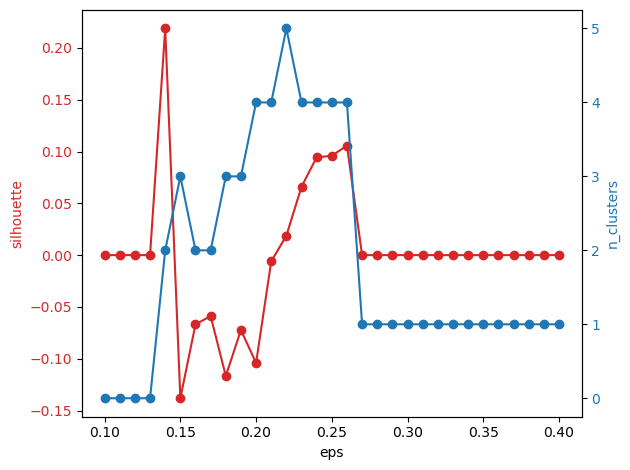

In [86]:
eps_range = np.arange(0.1, 0.4, 0.01)
dbscan_clustering(eps_range, X_scaled)

100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 305.29it/s]


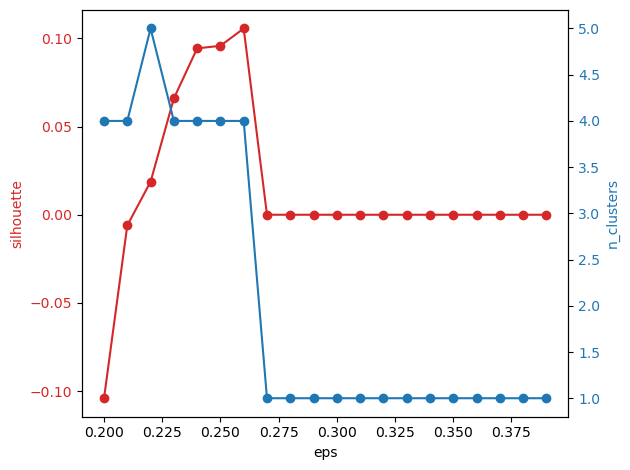

In [87]:
eps_range = np.arange(0.2, 0.4, 0.01)
dbscan_clustering(eps_range, X_scaled)

100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 222.18it/s]


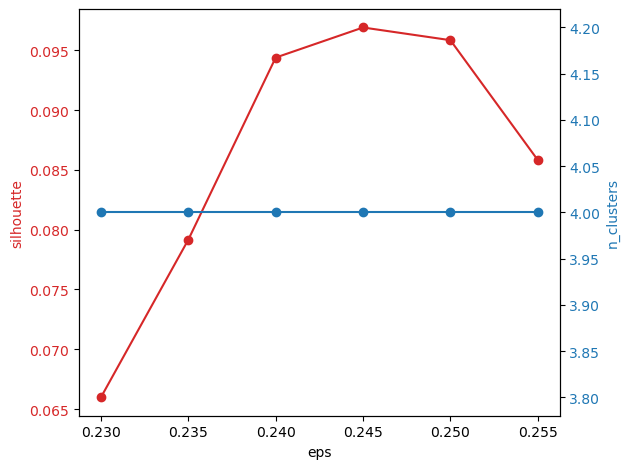

In [88]:
eps_range = np.arange(0.23, 0.26, 0.005)
dbscan_clustering(eps_range, X_scaled)

In [89]:
dbscan = DBSCAN(eps=0.245).fit(X_scaled)
labels = dbscan.labels_

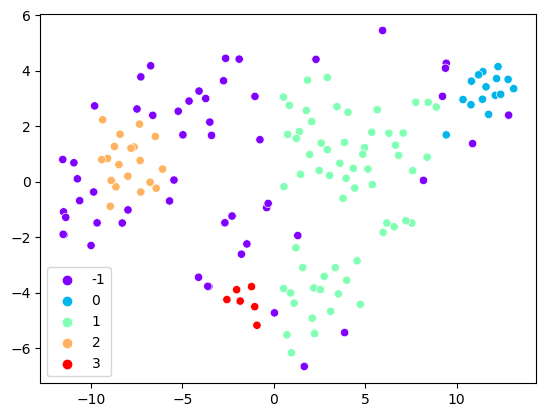

In [90]:
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=labels, palette="rainbow");

In [91]:
data["labels"] = labels
data["labels"].value_counts(normalize=True)

 1    0.403846
-1    0.339744
 2    0.121795
 0    0.096154
 3    0.038462
Name: labels, dtype: float64

In [92]:
data.groupby("labels").median().T.round(2)

labels,-1,0,1,2,3
Score,4.67,7.28,5.94,4.42,4.51
GDP per capita,0.74,1.38,1.12,0.37,0.92
Social support,1.12,1.53,1.40,1.03,1.05
Healthy life expectancy,0.60,1.01,0.84,0.38,0.66
Freedom to make life choices,0.40,0.56,0.44,0.35,0.24
Generosity,0.22,0.27,0.13,0.21,0.09
Perceptions of corruption,0.09,0.31,0.06,0.08,0.06
